# ***Exercise : Kaggle's Advertising Dataset***
### **Himel Sarder**
### **info.himelcse@gmail.com**
### **GitHub : https://github.com/Himel-Sarder**

In [162]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

In [163]:
df = pd.read_csv('advertising.csv')

In [164]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Text(0, 0.5, 'Sales')

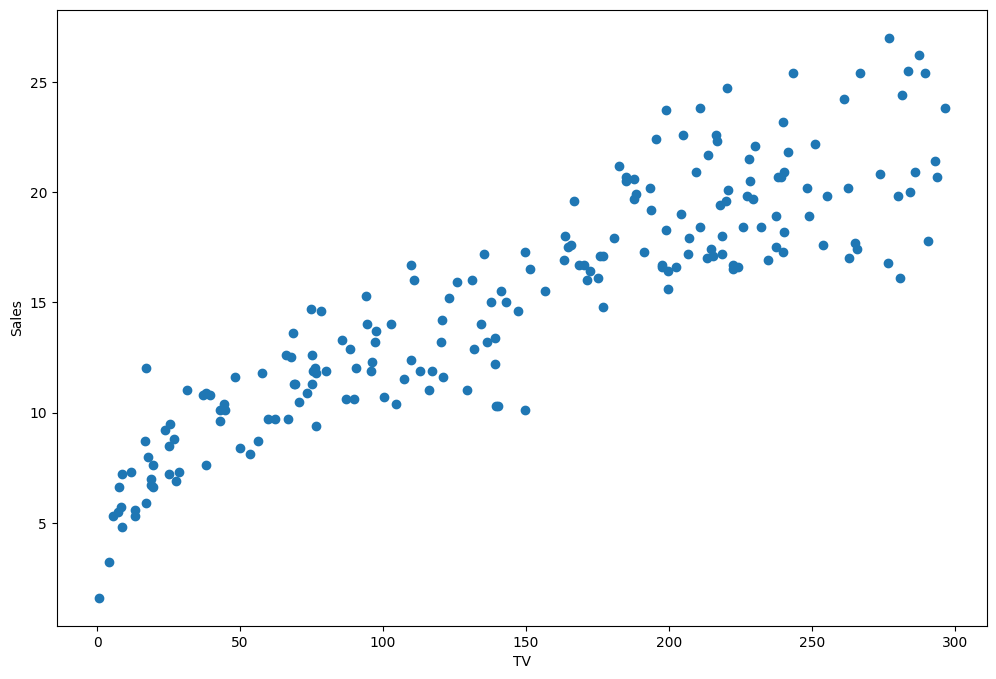

In [165]:
plt.figure(figsize=(12, 8))
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

In [166]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [167]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [168]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
lr = LinearRegression()

In [172]:
lr.fit(X_train,y_train)

LinearRegression()

In [173]:
X_test

,TV
126,7.8
104,238.2
99,135.2
92,217.7
111,241.7
167,206.8
116,139.2
96,197.6
52,216.4
69,216.8


In [174]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

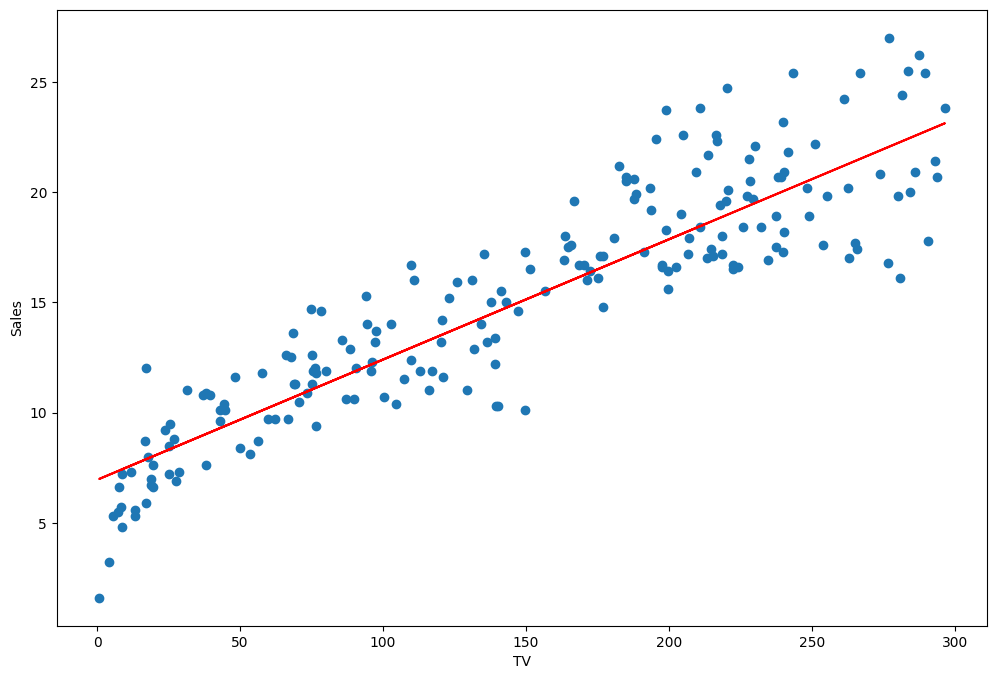

In [175]:
plt.figure(figsize=(12, 8))
plt.scatter(df['TV'],df['Sales'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('TV')
plt.ylabel('Sales')

In [176]:
m = lr.coef_
m

array([0.05454575])

In [177]:
c = lr.intercept_
c

6.948683200001357

In [178]:
predictions = lr.predict(X_test)
predictions

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [179]:
print(sqrt(mean_squared_error(y_test, predictions)))

2.019296008966231


In [180]:
print("The linear model is: Y = {:.5f} + {:.5f}X".format(lr.intercept_, lr.coef_[0]))

The linear model is: Y = 6.94868 + 0.05455X


In [181]:
X = df['TV']
y = df['Sales']

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train)

# Refit the model with the updated data
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.52e-52
Time:                        05:51:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [182]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

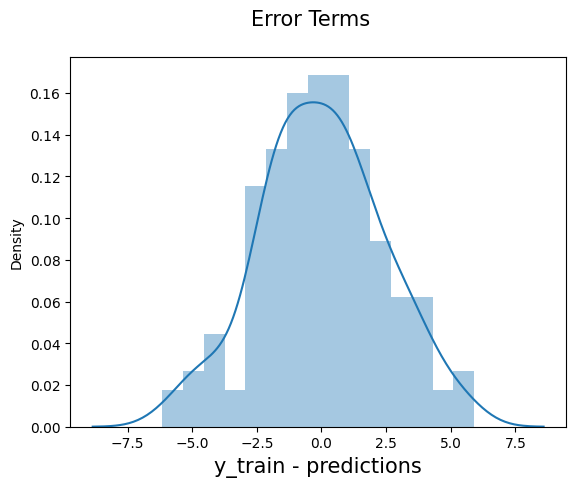

In [183]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - predictions', fontsize = 15)         # X-label
plt.show()